In [1]:
# Packages Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Dataset Import

In [2]:
df_cars_mpg = pd.read_csv('car.csv')

In [3]:
df_cars_mpg.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [4]:
df_cars_mpg.shape

(398, 8)

In [30]:
df_cars_mpg.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,0.625628
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.484569
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000


# Exploratory Data Analysis

In [6]:
df_cars_mpg[df_cars_mpg == '?'] = np.nan

<AxesSubplot:>

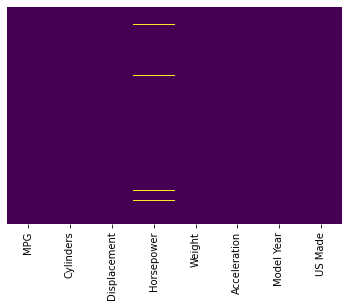

In [7]:
sns.heatmap(df_cars_mpg.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df_cars_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [9]:
df_cars_mpg[df_cars_mpg['Displacement'] >= 98].sort_values(by='Displacement')

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
309,41.5,4,98.0,76,2144,14.7,80,0
351,34.4,4,98.0,65,2045,16.2,81,1
352,29.9,4,98.0,65,2380,20.7,81,1
245,36.1,4,98.0,66,1800,14.4,78,1
237,30.5,4,98.0,63,2051,17.0,77,1
...,...,...,...,...,...,...,...,...
7,14.0,8,440.0,215,4312,8.5,70,1
6,14.0,8,454.0,220,4354,9.0,70,1
8,14.0,8,455.0,225,4425,10.0,70,1
95,12.0,8,455.0,225,4951,11.0,73,1


In [10]:
df_cars_mpg[df_cars_mpg['Horsepower'].isna()]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,0
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,0
374,23.0,4,151.0,NaN,3035,20.5,82,1


In [11]:
df_cars_mpg['Horsepower'] = df_cars_mpg['Horsepower'].astype('float64')

In [12]:
interpol_linear = df_cars_mpg.loc[:,['Displacement','Horsepower']].sort_values(by='Displacement').interpolate(method ='linear')

In [13]:
interpol_linear.columns = ['Displacement_new','Horsepower_new']

In [14]:
new_df = pd.concat([df_cars_mpg.sort_values(by='Displacement'),interpol_linear],axis=1)

In [15]:
new_df[new_df['Horsepower'].isna()]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made,Displacement_new,Horsepower_new
330,40.9,4,85.0,NaN,1835,17.3,80,0,85.0,67.5
32,25.0,4,98.0,NaN,2046,19.0,71,1,98.0,69.0
354,34.5,4,100.0,NaN,2320,15.8,81,0,100.0,75.5
336,23.6,4,140.0,NaN,2905,14.3,80,1,140.0,90.0
374,23.0,4,151.0,NaN,3035,20.5,82,1,151.0,87.0
126,21.0,6,200.0,NaN,2875,17.0,74,1,200.0,83.0


In [16]:
new_df.drop(['Displacement','Horsepower'],axis=1,inplace=True)

In [17]:
new_df.rename(columns = {'Displacement_new':'Displacement', 'Horsepower_new':'Horsepower'}, inplace = True)

In [18]:
new_df = new_df.sort_index()

In [19]:
new_df

,MPG,Cylinders,Weight,Acceleration,Model Year,US Made,Displacement,Horsepower
0,18.0,8,3504,12.0,70,1,307.0,130.0
1,15.0,8,3693,11.5,70,1,350.0,165.0
2,18.0,8,3436,11.0,70,1,318.0,150.0
3,16.0,8,3433,12.0,70,1,304.0,150.0
4,17.0,8,3449,10.5,70,1,302.0,140.0
...,...,...,...,...,...,...,...,...
393,27.0,4,2790,15.6,82,1,140.0,86.0
394,44.0,4,2130,24.6,82,0,97.0,52.0
395,32.0,4,2295,11.6,82,1,135.0,84.0
396,28.0,4,2625,18.6,82,1,120.0,79.0


In [20]:
new_df.isnull().sum()

MPG             0
Cylinders       0
Weight          0
Acceleration    0
Model Year      0
US Made         0
Displacement    0
Horsepower      0
dtype: int64

In [21]:
new_df['Horsepower'] = new_df['Horsepower'].astype('int64')

In [22]:
# test = {'MPG':[40.9,25,34.5,23.6,23.0,21.0],'Model Year':}
new_df[(new_df['MPG'].isin([40.9,25,34.5,23.6,23.0,21.0])) & (new_df['Model Year'].isin([80,71,81,80,82,74]))]

,MPG,Cylinders,Weight,Acceleration,Model Year,US Made,Displacement,Horsepower
31,25.0,4,2228,14.0,71,0,113.0,95
32,25.0,4,2046,19.0,71,1,98.0,69
49,23.0,4,2220,14.0,71,1,122.0,86
126,21.0,6,2875,17.0,74,1,200.0,83
132,25.0,4,2542,17.0,74,1,140.0,75
330,40.9,4,1835,17.3,80,0,85.0,67
336,23.6,4,2905,14.3,80,1,140.0,90
354,34.5,4,2320,15.8,81,0,100.0,75
374,23.0,4,3035,20.5,82,1,151.0,87
386,25.0,6,2945,16.4,82,1,181.0,110


<AxesSubplot:xlabel='Acceleration'>

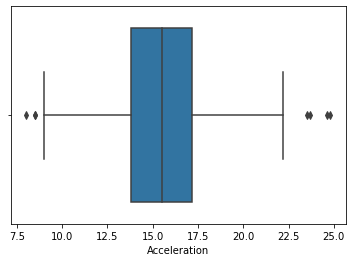

In [23]:
sns.boxplot(x=df_cars_mpg['Acceleration'])

<AxesSubplot:xlabel='Horsepower'>

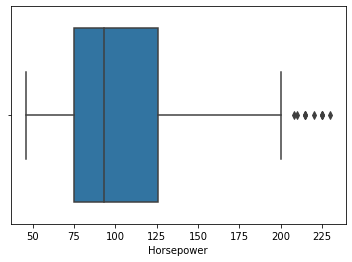

In [24]:
sns.boxplot(x=df_cars_mpg['Horsepower'])

In [28]:
def find_anomalies(data):
    anomalies = []
    
    for col in data:
        Q1 = np.percentile(data[col], 25,
                interpolation = 'midpoint')
 
        Q3 = np.percentile(data[col], 75,
                        interpolation = 'midpoint')
        IQR = Q3 - Q1
        
        print('Col:',col)
        
        print('Q1:',Q1,'Q3:',Q3,'IQR:',IQR)

        upper = np.where(data[col] >= (Q3+1.5*IQR))

        lower = np.where(data[col] <= (Q1-1.5*IQR))

        print(lower)
        print(upper)
        data.drop(upper[0], inplace = True)
        data.drop(lower[0], inplace = True)

In [29]:
find_anomalies(new_df)

Col: MPG
Q1: 17.5 Q3: 29.0 IQR: 11.5
Col: Cylinders
Q1: 4.0 Q3: 8.0 IQR: 4.0
Col: Weight
Q1: 2227.0 Q3: 3609.0 IQR: 1382.0
Col: Acceleration
Q1: 13.850000000000001 Q3: 17.0 IQR: 3.1499999999999986
Col: Model Year
Q1: 73.0 Q3: 79.0 IQR: 6.0
Col: US Made
Q1: 0.0 Q3: 1.0 IQR: 1.0
Col: Displacement
Q1: 105.0 Q3: 262.0 IQR: 157.0
Col: Horsepower
Q1: 76.0 Q3: 125.0 IQR: 49.0


# Data Visualization

<AxesSubplot:xlabel='Horsepower', ylabel='MPG'>

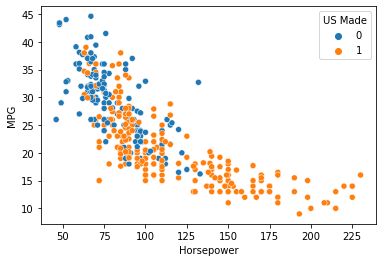

In [27]:
sns.scatterplot(x="Horsepower",
                    y="MPG",
                    hue='US Made',
                    data=new_df)

<AxesSubplot:xlabel='Weight', ylabel='MPG'>

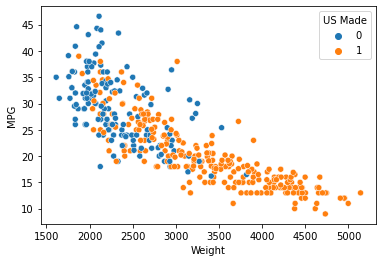

In [504]:
sns.scatterplot(x="Weight",
                    y="MPG",
                    hue='US Made',
                    data=new_df)

<AxesSubplot:xlabel='Cylinders', ylabel='Horsepower'>

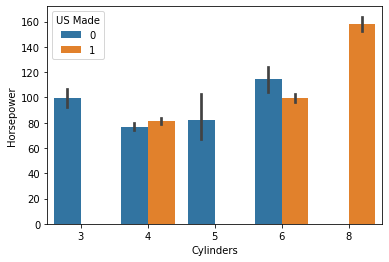

In [505]:
sns.barplot(x="Cylinders", y="Horsepower", hue="US Made", data=new_df)

In [506]:
new_df['Model Year'].value_counts()

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: Model Year, dtype: int64

In [507]:
year_bins = [70, 75, 80, 85, 90, 95, 100]
new_df.groupby(pd.cut(new_df['Model Year'], bins=year_bins))
new_df.head()

,MPG,Cylinders,Weight,Acceleration,Model Year,US Made,Displacement,Horsepower
0,18.0,8,3504,12.0,70,1,307.0,130
1,15.0,8,3693,11.5,70,1,350.0,165
2,18.0,8,3436,11.0,70,1,318.0,150
3,16.0,8,3433,12.0,70,1,304.0,150
4,17.0,8,3449,10.5,70,1,302.0,140


In [509]:
 new_df = new_df.drop(['Model Year Bins'],axis=1)

In [510]:
year_bins = [65,70, 75, 80, 85]
labels = ['1965-1970','1970-1975','1975-1980','1980-1985']
new_df['Model Year Bins'] = pd.cut(new_df['Model Year'], bins=year_bins,labels=labels)
print (new_df.head())

    MPG  Cylinders  Weight  Acceleration  Model Year  US Made  Displacement  \
0  18.0          8    3504          12.0          70        1         307.0   
1  15.0          8    3693          11.5          70        1         350.0   
2  18.0          8    3436          11.0          70        1         318.0   
3  16.0          8    3433          12.0          70        1         304.0   
4  17.0          8    3449          10.5          70        1         302.0   

   Horsepower Model Year Bins  
0         130       1965-1970  
1         165       1965-1970  
2         150       1965-1970  
3         150       1965-1970  
4         140       1965-1970  


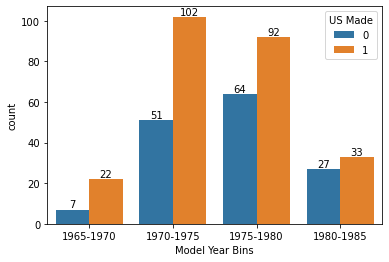

In [511]:
ax = sns.countplot(new_df['Model Year Bins'],hue=new_df['US Made'])
for container in ax.containers:
    ax.bar_label(container)

<AxesSubplot:xlabel='MPG', ylabel='Density'>

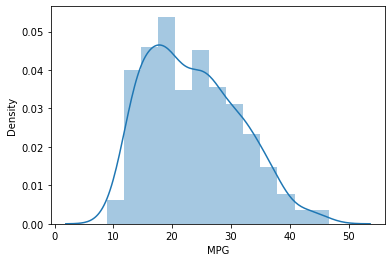

In [512]:
sns.distplot(df_cars_mpg['MPG'],)

<AxesSubplot:xlabel='MPG', ylabel='Density'>

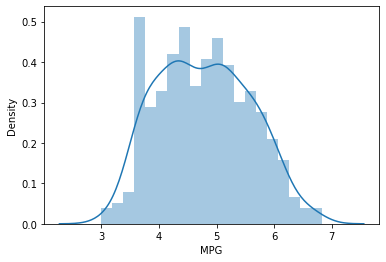

In [513]:
sns.distplot(np.sqrt(df_cars_mpg['MPG']),bins=20)

<AxesSubplot:xlabel='US Made', ylabel='count'>

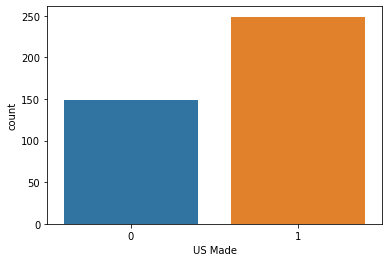

In [205]:
sns.countplot(new_df['US Made'])

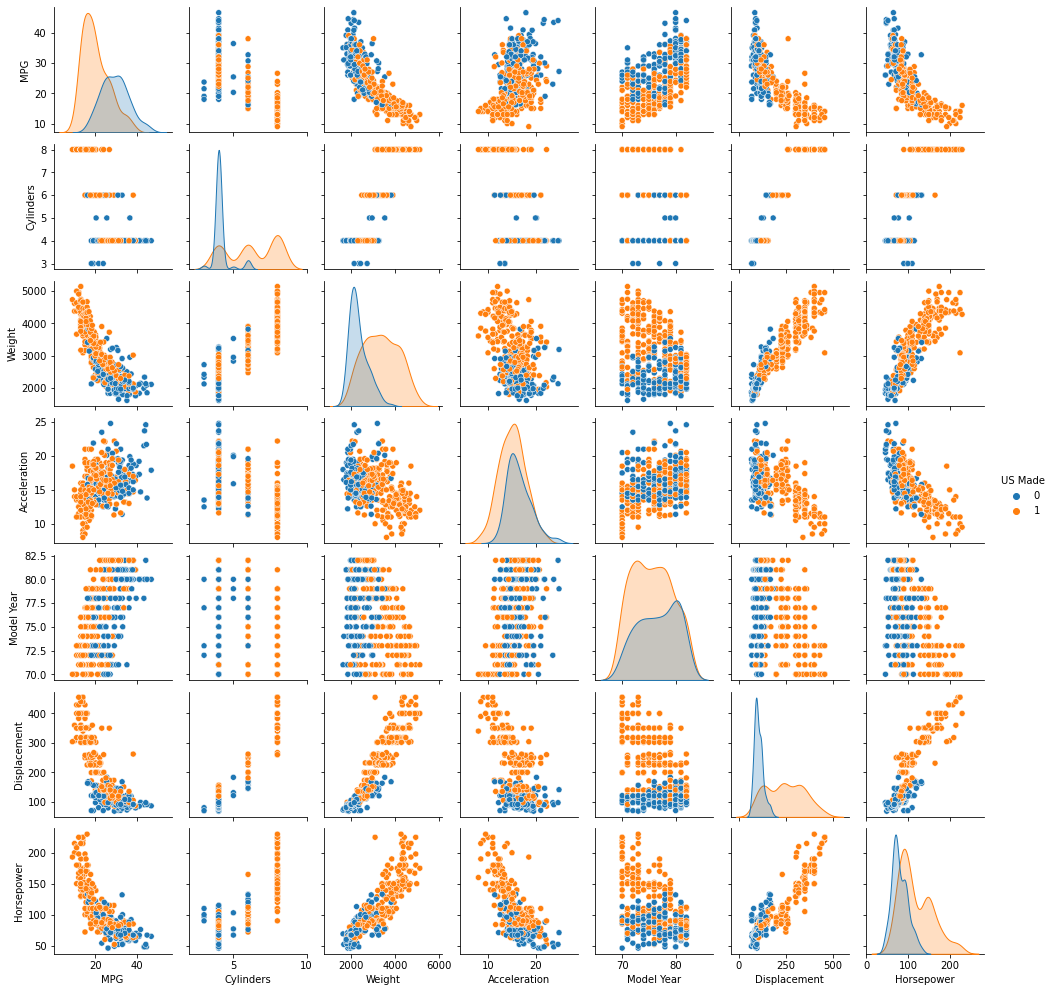

In [206]:
sns.pairplot(new_df,hue='US Made', height=2)

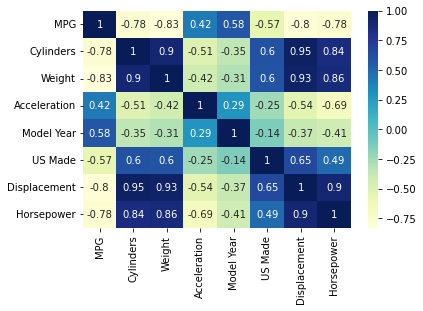

In [207]:
sns.heatmap(new_df.corr(method='pearson'),annot = True, cmap="YlGnBu");

# Train Test Split

In [514]:
from sklearn.model_selection import train_test_split

In [515]:
X = new_df.drop(['MPG','Model Year Bins'],axis=1)
y = np.sqrt(new_df['MPG'])

In [516]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=369)

In [517]:
from sklearn.linear_model import LinearRegression

In [518]:
full_model = LinearRegression()

In [519]:
full_model.fit(X_train,y_train)

LinearRegression()

In [520]:
full_model.intercept_

1.1814238532238255

In [521]:
coeff_info = pd.DataFrame(full_model.coef_,X.columns,columns=['Coefficient'])
coeff_info

,Coefficient
Cylinders,-0.045004
Weight,-0.000655
Acceleration,0.003473
Model Year,0.076351
US Made,-0.256793
Displacement,0.001584
Horsepower,-0.002028


In [522]:
print('R-Squared',full_model.score(X_test,y_test))

R-Squared 0.8511126850838664


In [523]:
print('Adjusted R-Squared',1 - (1-full_model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Adjusted R-Squared 0.841807227901608


In [524]:
full_model_pred = full_model.predict(X_test)

In [525]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [526]:
print("Full Model's MAE:", mean_absolute_error(y_test, full_model_pred))
print("Full Model's MSE:", mean_squared_error(y_test, full_model_pred))
print("Full Model's RMSE:", np.sqrt(mean_squared_error(y_test, full_model_pred)))
print("Full Model's R-Squared:", r2_score(y_test,full_model_pred))

Full Model's MAE: 0.23951618396569524
Full Model's MSE: 0.08974740623046186
Full Model's RMSE: 0.2995787145817637
Full Model's R-Squared: 0.8511126850838664


# Feature Selection - Step-wise Selection

In [527]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [528]:
sfs_md = SFS(LinearRegression(),
          k_features=(3,5),
          forward=True,
          floating=True,
          scoring = 'r2',
          cv = 5)

In [529]:
sfs_md.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), floating=True,
                          k_features=(3, 5), scoring='r2')

In [469]:
sfs_md.k_feature_names_

('Weight', 'Model Year', 'US Made')

In [470]:
import pandas as pd
pd.DataFrame.from_dict(sfs_md.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.7816140122006001, 0.7462869785615667, 0.710...",0.735906,"(Weight,)",0.051861,0.04035,0.020175
2,"(1, 3)","[0.8611288310597817, 0.8485346593977249, 0.834...",0.839831,"(Weight, Model Year)",0.019103,0.014863,0.007432
3,"(1, 3, 4)","[0.8805378038658311, 0.8653461209677362, 0.849...",0.851231,"(Weight, Model Year, US Made)",0.027934,0.021733,0.010867


In [471]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

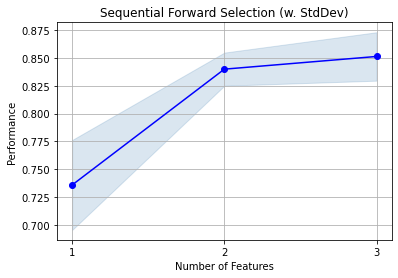

In [472]:
fig = plot_sfs(sfs_md.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()

# Through Iteration

In [454]:
new_df_fs = new_df[['Weight', 'Model Year', 'US Made']]

In [455]:
new_df_fs.head()

,Weight,Model Year,US Made
0,3504,70,1
1,3693,70,1
2,3436,70,1
3,3433,70,1
4,3449,70,1


In [456]:
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(new_df_fs, y, test_size=0.3, random_state=369)

In [457]:
best_model = LinearRegression()

In [458]:
best_model.fit(X_train_fs,y_train_fs)

LinearRegression()

In [459]:
best_model.intercept_

0.9851261997534819

In [460]:
best_model.coef_

array([-0.0006484 ,  0.07713425, -0.22075613])

In [461]:
print('R-Squared',best_model.score(X_test_fs,y_test_fs))

R-Squared 0.8426168224273309


In [462]:
print('Adjusted R-Squared',1 - (1-best_model.score(X_test_fs,y_test_fs))*(len(y_test_fs)-1)/(len(y_test_fs)-X_test_fs.shape[1]-1))

Adjusted R-Squared 0.8385465678349343


In [463]:
best_model_pred = best_model.predict(X_test_fs)

In [474]:
print("Best Model's MAE:", mean_absolute_error(y_test, best_model_pred))
print("Best Model's MSE:", mean_squared_error(y_test, best_model_pred))
print("Best Model's RMSE:", np.sqrt(mean_squared_error(y_test, best_model_pred)))


Best Model's MAE: 0.2446732799154489
Best Model's MSE: 0.09486860569291301
Best Model's RMSE: 0.3080074766834614


# Stats model for linear regression

In [465]:
import statsmodels.api as sm
best_model_reg = sm.OLS(y_train_fs, sm.add_constant(X_train_fs)).fit()

In [466]:
print(best_model_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     553.9
Date:                Mon, 23 Jan 2023   Prob (F-statistic):          5.83e-116
Time:                        23:45:43   Log-Likelihood:                -64.993
No. Observations:                 278   AIC:                             138.0
Df Residuals:                     274   BIC:                             152.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9851      0.436      2.261      0.0

# Linear Regression Assumptions

## Linearity

In [227]:
best_model_residuals = y_test - best_model_pred

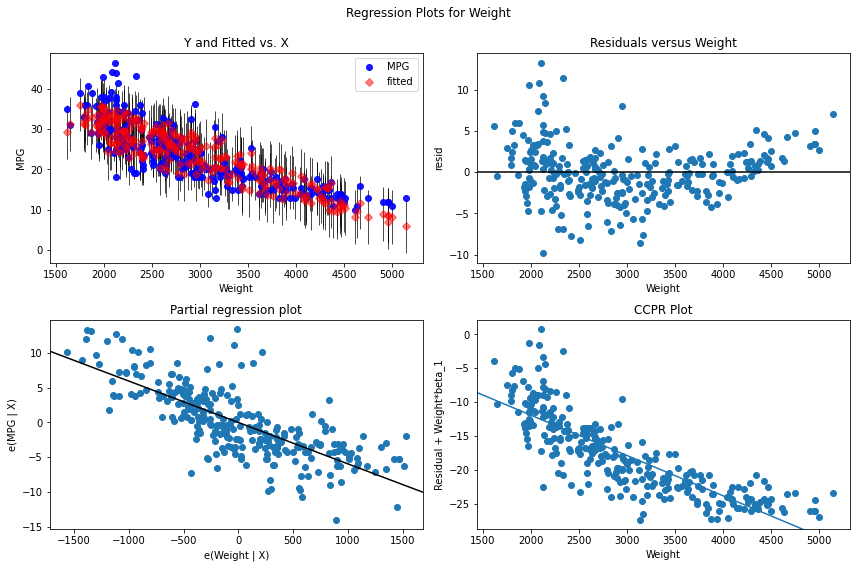

In [345]:
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(model_reg, 'Weight', fig=fig)

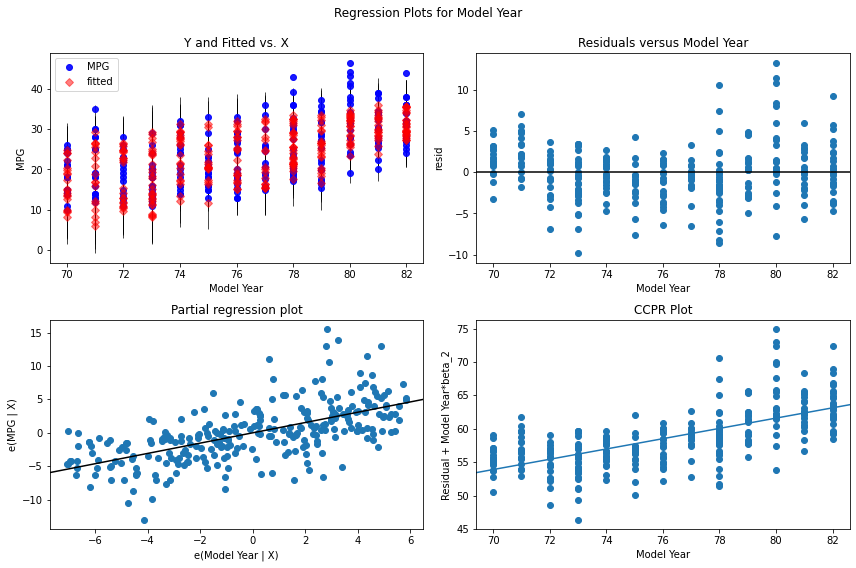

In [347]:
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(model_reg, 'Model Year', fig=fig)

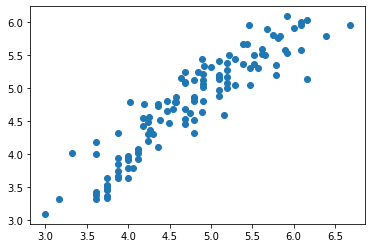

In [348]:
plt.scatter(y_test,best_model_pred)

## Normality Check

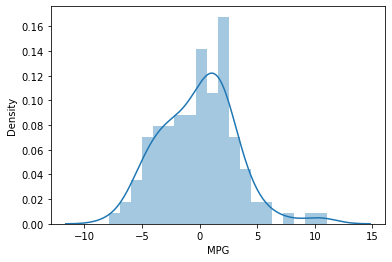

In [349]:
sns.distplot(best_model_residuals,bins=20);

## Homoscedasticity Check

In [351]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

vari_names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
breusch_ptest = sms.het_breuschpagan(model_reg.resid, model_reg.model.exog)

lzip(vari_names, breusch_ptest)

[('Lagrange multiplier statistic', 23.99165291775529),
 ('p-value', 2.508041279617347e-05),
 ('f-value', 8.626636322488604),
 ('f p-value', 1.721241217398157e-05)]

## Auto-correlation check

In [ ]:
# Dublin-Watson Test

## Multi-collinearity check

In [396]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [475]:
vif = pd.DataFrame()
# X_train_vif = X_train_feature.drop(['curbweight','peakrpm','carwidth'],axis=1)
X_train_vif = X_train_fs
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
0,Weight,17.79
1,Model Year,12.34
2,US Made,4.10


In [395]:
new_df.corr()

,MPG,Cylinders,Weight,Acceleration,Model Year,US Made,Displacement,Horsepower
MPG,1.000000,-0.775396,-0.831741,0.420289,0.579267,-0.568192,-0.804203,-0.776614
Cylinders,-0.775396,1.000000,0.896017,-0.505419,-0.348746,0.604351,0.950721,0.842835
Weight,-0.831741,0.896017,1.000000,-0.417457,-0.306564,0.598398,0.932824,0.864767
Acceleration,0.420289,-0.505419,-0.417457,1.000000,0.288137,-0.250806,-0.543684,-0.688605
Model Year,0.579267,-0.348746,-0.306564,0.288137,1.000000,-0.139883,-0.370164,-0.414310
US Made,-0.568192,0.604351,0.598398,-0.250806,-0.139883,1.000000,0.651407,0.485396
Displacement,-0.804203,0.950721,0.932824,-0.543684,-0.370164,0.651407,1.000000,0.897529
Horsepower,-0.776614,0.842835,0.864767,-0.688605,-0.414310,0.485396,0.897529,1.000000
